# 用いるデータ

<a href="http://mh.rgr.jp/memo/mq0111.htm" target="_blank">分子性物質のデータ（融点・沸点）</a>

In [1]:
import pandas as pd
data = [['HF', 19.5, 20.0, 1.826567],
        ['HCl', -84.9, 36.5, 1.1086],
        ['HBr', -67.0, 80.9, 0.8271],
        ['HI', -35.1, 127.9, 0.4477],
        ['H2O', 100.0, 18.0, 1.8546],
        ['H2S', -60.7, 34.1, 0.978325],
        ['H2Se', -42, 81.0, 0.627],
        ['NH3', -33.4, 17.0, 1.471772],
        ['PH3', -87, 34.0, 0.57397],
        ['AsH3', -55, 77.9, 0.217],
        ['SbH3', -17.1, 124.8, 0.116],
        ['CH4', -161.49, 16.0, 0],
        ['SiH4', -111.8, 32.1, 0],
        ['GeH4', -90, 76.6, 0],
        ['SnH4', -52, 122.7, 0],
        ['He', -268.934, 4.0, 0],
        ['Ne', -246.048, 20.2, 0],
        ['Ar', -185.7, 39.9, 0],
        ['Kr', -152.3, 83.8, 0],
        ['Xe', -108.1, 131.3, 0],
       ]
df = pd.DataFrame(data, columns = ['molecule', 'boiling point', 'molecular weight', 'dipole monent'])
df

,molecule,boiling point,molecular weight,dipole monent
0,HF,19.500,20.0,1.826567
1,HCl,-84.900,36.5,1.108600
2,HBr,-67.000,80.9,0.827100
3,HI,-35.100,127.9,0.447700
4,H2O,100.000,18.0,1.854600
5,H2S,-60.700,34.1,0.978325
6,H2Se,-42.000,81.0,0.627000
7,NH3,-33.400,17.0,1.471772
8,PH3,-87.000,34.0,0.573970
9,AsH3,-55.000,77.9,0.217000


In [2]:
X = df.loc[:, ['molecular weight', 'dipole monent']].as_matrix()
X

array([[  2.00000000e+01,   1.82656700e+00],
       [  3.65000000e+01,   1.10860000e+00],
       [  8.09000000e+01,   8.27100000e-01],
       [  1.27900000e+02,   4.47700000e-01],
       [  1.80000000e+01,   1.85460000e+00],
       [  3.41000000e+01,   9.78325000e-01],
       [  8.10000000e+01,   6.27000000e-01],
       [  1.70000000e+01,   1.47177200e+00],
       [  3.40000000e+01,   5.73970000e-01],
       [  7.79000000e+01,   2.17000000e-01],
       [  1.24800000e+02,   1.16000000e-01],
       [  1.60000000e+01,   0.00000000e+00],
       [  3.21000000e+01,   0.00000000e+00],
       [  7.66000000e+01,   0.00000000e+00],
       [  1.22700000e+02,   0.00000000e+00],
       [  4.00000000e+00,   0.00000000e+00],
       [  2.02000000e+01,   0.00000000e+00],
       [  3.99000000e+01,   0.00000000e+00],
       [  8.38000000e+01,   0.00000000e+00],
       [  1.31300000e+02,   0.00000000e+00]])

In [3]:
Y = df['boiling point'].as_matrix()
Y

array([  19.5  ,  -84.9  ,  -67.   ,  -35.1  ,  100.   ,  -60.7  ,
        -42.   ,  -33.4  ,  -87.   ,  -55.   ,  -17.1  , -161.49 ,
       -111.8  ,  -90.   ,  -52.   , -268.934, -246.048, -185.7  ,
       -152.3  , -108.1  ])

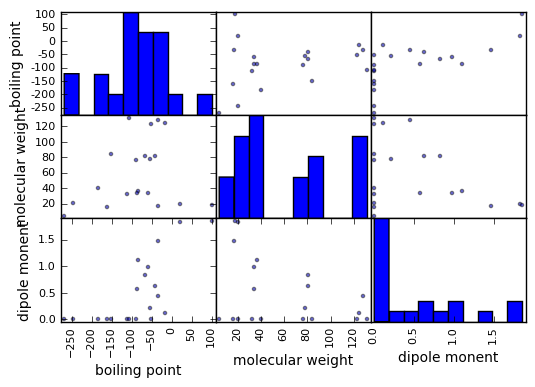

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import *
scatter_matrix(df)
plt.show()

# まずは一番便利な scikit-learn から

In [5]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [6]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# 回帰係数
lr.coef_

array([   1.17775083,  124.38195483])

In [8]:
# 切片
lr.intercept_

-218.85778226168119

In [9]:
print("y = f(x) = w1x1 + w2x2 + t; (w1, w2, t) = ({0}, {1}, {2})".format(lr.coef_[0], lr.coef_[1], lr.intercept_))

y = f(x) = w1x1 + w2x2 + t; (w1, w2, t) = (1.1777508314139944, 124.38195482549655, -218.8577822616812)


In [10]:
# 決定係数
lr.score(X, Y)

0.78084985722905187

In [11]:
lr.predict([200, 0.5])

array([ 78.88336143])

In [12]:
lr.predict([[150, 0], [100, 1.0]])

array([-42.19515755,  23.29925571])

# 次は、ガチPythonで。

In [13]:
# 平均値を求める関数
def mean(list):
    sum = 0
    for x in list:
        sum += x
    return sum / len(list)

In [14]:
# 分散を求める関数
def variance(list):
    ave = mean(list)
    sum = 0
    for x in list:
        sum += (x - ave) ** 2
    return sum / len(list)

In [15]:
# 標準偏差を求める関数
import math
def standard_deviation(list):
    return math.sqrt(variance(list))

In [16]:
# 共分散 = 偏差積の平均
def covariance(list1, list2): 
    mean1 = mean(list1)
    mean2 = mean(list2)
    sum = 0
    for d1, d2 in zip(list1, list2):
        sum += (d1 - mean1) * (d2 - mean2)
    return sum / len(list1)

In [17]:
# 相関係数 = 共分散を list1, list2 の標準偏差で割ったもの
def correlation(list1, list2):
    return covariance(list1, list2) / (standard_deviation(list1) * standard_deviation(list2))

In [18]:
# a の影響を除いた、b と y の偏回帰係数 partial regression coefficient を求める関数
def partial_regression(a, b, y):
    rby = correlation(b, y)
    ray = correlation(a, y)
    rab = correlation(a, b)
    return (rby - ray * rab) * standard_deviation(y) / ((1 - rab ** 2) * standard_deviation(b))

In [19]:
# 定数 w1 = （x2 の影響を除いた、x1 と y の偏回帰係数）
w1 = partial_regression(X[:, 1], X[:, 0], Y)

In [20]:
# 定数 w2 = （x1 の影響を除いた、x2 と y の偏回帰係数）
w2 = partial_regression(X[:, 0], X[:, 1], Y)

In [21]:
# 定数 t　＝　yの平均　－　w1*x1の平均　－　w2*x2の平均
t = mean(Y) - w1 * mean(X[:, 0]) - w2 * mean(X[:, 1])

In [22]:
# 回帰直線の式を表示
print("y = f(x) = w1x1 + w2x2 + t; (w1, w2, t) = ({0}, {1}, {2})".format(w1, w2, t))

y = f(x) = w1x1 + w2x2 + t; (w1, w2, t) = (1.1777508314139928, 124.38195482549644, -218.85778226168105)


# さて、表計算で解けと言われたので pandas で書いてみましょうか。

In [23]:
import copy
from IPython.display import display
excel = copy.deepcopy(df)
excel

,molecule,boiling point,molecular weight,dipole monent
0,HF,19.500,20.0,1.826567
1,HCl,-84.900,36.5,1.108600
2,HBr,-67.000,80.9,0.827100
3,HI,-35.100,127.9,0.447700
4,H2O,100.000,18.0,1.854600
5,H2S,-60.700,34.1,0.978325
6,H2Se,-42.000,81.0,0.627000
7,NH3,-33.400,17.0,1.471772
8,PH3,-87.000,34.0,0.573970
9,AsH3,-55.000,77.9,0.217000


In [24]:
excel['y'] = excel['boiling point']
excel['x1'] = excel['molecular weight']
excel['x2'] = excel['dipole monent']
mean_y = mean(excel['y'])
mean_x1 = mean(excel['x1'])
mean_x2 = mean(excel['x2'])
display(excel, pd.DataFrame([[mean_y, mean_x1, mean_x2]], columns=['y','x1', 'x2'], index=['mean']))

,molecule,boiling point,molecular weight,dipole monent,y,x1,x2
0,HF,19.500,20.0,1.826567,19.500,20.0,1.826567
1,HCl,-84.900,36.5,1.108600,-84.900,36.5,1.108600
2,HBr,-67.000,80.9,0.827100,-67.000,80.9,0.827100
3,HI,-35.100,127.9,0.447700,-35.100,127.9,0.447700
4,H2O,100.000,18.0,1.854600,100.000,18.0,1.854600
5,H2S,-60.700,34.1,0.978325,-60.700,34.1,0.978325
6,H2Se,-42.000,81.0,0.627000,-42.000,81.0,0.627000
7,NH3,-33.400,17.0,1.471772,-33.400,17.0,1.471772
8,PH3,-87.000,34.0,0.573970,-87.000,34.0,0.573970
9,AsH3,-55.000,77.9,0.217000,-55.000,77.9,0.217000


,y,x1,x2
mean,-86.9536,58.935,0.502432


In [25]:
excel['y-mean(y)'] = [y - mean_y for y in excel['y']]
excel['x1-mean(x1)'] = [x1 - mean_x1 for x1 in excel['x1']]
excel['x2-mean(x2)'] = [x2 - mean_x2 for x2 in excel['x2']]
display(excel, pd.DataFrame([[mean_y, mean_x1, mean_x2]], columns=['y','x1', 'x2'], index=['mean']))

,molecule,boiling point,molecular weight,dipole monent,y,x1,x2,y-mean(y),x1-mean(x1),x2-mean(x2)
0,HF,19.500,20.0,1.826567,19.500,20.0,1.826567,106.4536,-38.935,1.324135
1,HCl,-84.900,36.5,1.108600,-84.900,36.5,1.108600,2.0536,-22.435,0.606168
2,HBr,-67.000,80.9,0.827100,-67.000,80.9,0.827100,19.9536,21.965,0.324668
3,HI,-35.100,127.9,0.447700,-35.100,127.9,0.447700,51.8536,68.965,-0.054732
4,H2O,100.000,18.0,1.854600,100.000,18.0,1.854600,186.9536,-40.935,1.352168
5,H2S,-60.700,34.1,0.978325,-60.700,34.1,0.978325,26.2536,-24.835,0.475893
6,H2Se,-42.000,81.0,0.627000,-42.000,81.0,0.627000,44.9536,22.065,0.124568
7,NH3,-33.400,17.0,1.471772,-33.400,17.0,1.471772,53.5536,-41.935,0.969340
8,PH3,-87.000,34.0,0.573970,-87.000,34.0,0.573970,-0.0464,-24.935,0.071538
9,AsH3,-55.000,77.9,0.217000,-55.000,77.9,0.217000,31.9536,18.965,-0.285432


,y,x1,x2
mean,-86.9536,58.935,0.502432


In [26]:
excel['(y-mean(y))**2'] = [sa ** 2 for sa in excel['y-mean(y)']]
excel['(x1-mean(x1))**2'] = [sa ** 2 for sa in excel['x1-mean(x1)']]
excel['(x2-mean(x2))**2'] = [sa ** 2 for sa in excel['x2-mean(x2)']]
display(excel, pd.DataFrame([[mean_y, mean_x1, mean_x2]], columns=['y','x1', 'x2'], index=['mean']))

,molecule,boiling point,molecular weight,dipole monent,y,x1,x2,y-mean(y),x1-mean(x1),x2-mean(x2),(y-mean(y))**2,(x1-mean(x1))**2,(x2-mean(x2))**2
0,HF,19.500,20.0,1.826567,19.500,20.0,1.826567,106.4536,-38.935,1.324135,11332.368953,1515.934225,1.753334
1,HCl,-84.900,36.5,1.108600,-84.900,36.5,1.108600,2.0536,-22.435,0.606168,4.217273,503.329225,0.367440
2,HBr,-67.000,80.9,0.827100,-67.000,80.9,0.827100,19.9536,21.965,0.324668,398.146153,482.461225,0.105410
3,HI,-35.100,127.9,0.447700,-35.100,127.9,0.447700,51.8536,68.965,-0.054732,2688.795833,4756.171225,0.002996
4,H2O,100.000,18.0,1.854600,100.000,18.0,1.854600,186.9536,-40.935,1.352168,34951.648553,1675.674225,1.828359
5,H2S,-60.700,34.1,0.978325,-60.700,34.1,0.978325,26.2536,-24.835,0.475893,689.251513,616.777225,0.226474
6,H2Se,-42.000,81.0,0.627000,-42.000,81.0,0.627000,44.9536,22.065,0.124568,2020.826153,486.864225,0.015517
7,NH3,-33.400,17.0,1.471772,-33.400,17.0,1.471772,53.5536,-41.935,0.969340,2867.988073,1758.544225,0.939621
8,PH3,-87.000,34.0,0.573970,-87.000,34.0,0.573970,-0.0464,-24.935,0.071538,0.002153,621.754225,0.005118
9,AsH3,-55.000,77.9,0.217000,-55.000,77.9,0.217000,31.9536,18.965,-0.285432,1021.032553,359.671225,0.081471


,y,x1,x2
mean,-86.9536,58.935,0.502432


In [27]:
variance_y = mean(excel['(y-mean(y))**2'])
variance_x1 = mean(excel['(x1-mean(x1))**2'])
variance_x2 = mean(excel['(x2-mean(x2))**2'])
sd_y = math.sqrt(variance_y)
sd_x1 = math.sqrt(variance_x1)
sd_x2 = math.sqrt(variance_x2)
display(excel, pd.DataFrame([[mean_y, mean_x1, mean_x2], [variance_y, variance_x1, variance_x2], [sd_y, sd_x1, sd_x2]], 
                            columns=['y','x1', 'x2'], index=['mean', 'variance', 'sd']))

,molecule,boiling point,molecular weight,dipole monent,y,x1,x2,y-mean(y),x1-mean(x1),x2-mean(x2),(y-mean(y))**2,(x1-mean(x1))**2,(x2-mean(x2))**2
0,HF,19.500,20.0,1.826567,19.500,20.0,1.826567,106.4536,-38.935,1.324135,11332.368953,1515.934225,1.753334
1,HCl,-84.900,36.5,1.108600,-84.900,36.5,1.108600,2.0536,-22.435,0.606168,4.217273,503.329225,0.367440
2,HBr,-67.000,80.9,0.827100,-67.000,80.9,0.827100,19.9536,21.965,0.324668,398.146153,482.461225,0.105410
3,HI,-35.100,127.9,0.447700,-35.100,127.9,0.447700,51.8536,68.965,-0.054732,2688.795833,4756.171225,0.002996
4,H2O,100.000,18.0,1.854600,100.000,18.0,1.854600,186.9536,-40.935,1.352168,34951.648553,1675.674225,1.828359
5,H2S,-60.700,34.1,0.978325,-60.700,34.1,0.978325,26.2536,-24.835,0.475893,689.251513,616.777225,0.226474
6,H2Se,-42.000,81.0,0.627000,-42.000,81.0,0.627000,44.9536,22.065,0.124568,2020.826153,486.864225,0.015517
7,NH3,-33.400,17.0,1.471772,-33.400,17.0,1.471772,53.5536,-41.935,0.969340,2867.988073,1758.544225,0.939621
8,PH3,-87.000,34.0,0.573970,-87.000,34.0,0.573970,-0.0464,-24.935,0.071538,0.002153,621.754225,0.005118
9,AsH3,-55.000,77.9,0.217000,-55.000,77.9,0.217000,31.9536,18.965,-0.285432,1021.032553,359.671225,0.081471


,y,x1,x2
mean,-86.953600,58.935000,0.502432
variance,7057.696185,1739.624275,0.387350
sd,84.010096,41.708803,0.622375


In [32]:
excel['(x1-mean(x1)) * (x2-mean(x2))'] = excel['x1-mean(x1)'] * excel['x2-mean(x2)']
excel['(y-mean(y)) * (x1-mean(x1))'] = excel['y-mean(y)'] * excel['x1-mean(x1)']
excel['(y-mean(y)) * (x2-mean(x2))'] = excel['y-mean(y)'] * excel['x2-mean(x2)']
display(excel, pd.DataFrame([[mean_y, mean_x1, mean_x2], [variance_y, variance_x1, variance_x2], [sd_y, sd_x1, sd_x2]], 
                            columns=['y','x1', 'x2'], index=['mean', 'variance', 'sd']))

,molecule,boiling point,molecular weight,dipole monent,y,x1,x2,y-mean(y),x1-mean(x1),x2-mean(x2),(y-mean(y))**2,(x1-mean(x1))**2,(x2-mean(x2))**2,(y-mean(y)) * (x1-mean(x1)),(y-mean(y)) * (x2-mean(x2)),(x1-mean(x1)) * (x2-mean(x2))
0,HF,19.500,20.0,1.826567,19.500,20.0,1.826567,106.4536,-38.935,1.324135,11332.368953,1515.934225,1.753334,-4144.770916,140.958970,-51.555208
1,HCl,-84.900,36.5,1.108600,-84.900,36.5,1.108600,2.0536,-22.435,0.606168,4.217273,503.329225,0.367440,-46.072516,1.244827,-13.599386
2,HBr,-67.000,80.9,0.827100,-67.000,80.9,0.827100,19.9536,21.965,0.324668,398.146153,482.461225,0.105410,438.280824,6.478301,7.131339
3,HI,-35.100,127.9,0.447700,-35.100,127.9,0.447700,51.8536,68.965,-0.054732,2688.795833,4756.171225,0.002996,3576.083524,-2.838036,-3.774572
4,H2O,100.000,18.0,1.854600,100.000,18.0,1.854600,186.9536,-40.935,1.352168,34951.648553,1675.674225,1.828359,-7652.945616,252.792731,-55.351009
5,H2S,-60.700,34.1,0.978325,-60.700,34.1,0.978325,26.2536,-24.835,0.475893,689.251513,616.777225,0.226474,-652.008156,12.493912,-11.818810
6,H2Se,-42.000,81.0,0.627000,-42.000,81.0,0.627000,44.9536,22.065,0.124568,2020.826153,486.864225,0.015517,991.901184,5.599794,2.748600
7,NH3,-33.400,17.0,1.471772,-33.400,17.0,1.471772,53.5536,-41.935,0.969340,2867.988073,1758.544225,0.939621,-2245.770216,51.911663,-40.649285
8,PH3,-87.000,34.0,0.573970,-87.000,34.0,0.573970,-0.0464,-24.935,0.071538,0.002153,621.754225,0.005118,1.156984,-0.003319,-1.783808
9,AsH3,-55.000,77.9,0.217000,-55.000,77.9,0.217000,31.9536,18.965,-0.285432,1021.032553,359.671225,0.081471,606.000024,-9.120570,-5.413212


,y,x1,x2
mean,-86.953600,58.935000,0.502432
variance,7057.696185,1739.624275,0.387350
sd,84.010096,41.708803,0.622375


In [34]:
covar_x1x2 = mean(excel['(x1-mean(x1)) * (x2-mean(x2))'])
covar_x1y = mean(excel['(y-mean(y)) * (x1-mean(x1))'])
covar_x2y = mean(excel['(y-mean(y)) * (x2-mean(x2))'])

corr_x1x2 = covar_x1x2 / (sd_x1 * sd_x2)
corr_x1y = covar_x1y / (sd_x1 * sd_y)
corr_x2y = covar_x2y / (sd_x2 * sd_y)
display(excel, pd.DataFrame([[mean_y, mean_x1, mean_x2], [variance_y, variance_x1, variance_x2], [sd_y, sd_x1, sd_x2]], 
                            columns=['y','x1', 'x2'], index=['mean', 'variance', 'sd']),
       pd.DataFrame([[covar_x1x2, covar_x1y, covar_x2y], [corr_x1x2, corr_x1y, corr_x2y]], index=['covariance', 'correlation'], columns=['x1,x2','x1,y', 'x2,y']))

,molecule,boiling point,molecular weight,dipole monent,y,x1,x2,y-mean(y),x1-mean(x1),x2-mean(x2),(y-mean(y))**2,(x1-mean(x1))**2,(x2-mean(x2))**2,(y-mean(y)) * (x1-mean(x1)),(y-mean(y)) * (x2-mean(x2)),(x1-mean(x1)) * (x2-mean(x2))
0,HF,19.500,20.0,1.826567,19.500,20.0,1.826567,106.4536,-38.935,1.324135,11332.368953,1515.934225,1.753334,-4144.770916,140.958970,-51.555208
1,HCl,-84.900,36.5,1.108600,-84.900,36.5,1.108600,2.0536,-22.435,0.606168,4.217273,503.329225,0.367440,-46.072516,1.244827,-13.599386
2,HBr,-67.000,80.9,0.827100,-67.000,80.9,0.827100,19.9536,21.965,0.324668,398.146153,482.461225,0.105410,438.280824,6.478301,7.131339
3,HI,-35.100,127.9,0.447700,-35.100,127.9,0.447700,51.8536,68.965,-0.054732,2688.795833,4756.171225,0.002996,3576.083524,-2.838036,-3.774572
4,H2O,100.000,18.0,1.854600,100.000,18.0,1.854600,186.9536,-40.935,1.352168,34951.648553,1675.674225,1.828359,-7652.945616,252.792731,-55.351009
5,H2S,-60.700,34.1,0.978325,-60.700,34.1,0.978325,26.2536,-24.835,0.475893,689.251513,616.777225,0.226474,-652.008156,12.493912,-11.818810
6,H2Se,-42.000,81.0,0.627000,-42.000,81.0,0.627000,44.9536,22.065,0.124568,2020.826153,486.864225,0.015517,991.901184,5.599794,2.748600
7,NH3,-33.400,17.0,1.471772,-33.400,17.0,1.471772,53.5536,-41.935,0.969340,2867.988073,1758.544225,0.939621,-2245.770216,51.911663,-40.649285
8,PH3,-87.000,34.0,0.573970,-87.000,34.0,0.573970,-0.0464,-24.935,0.071538,0.002153,621.754225,0.005118,1.156984,-0.003319,-1.783808
9,AsH3,-55.000,77.9,0.217000,-55.000,77.9,0.217000,31.9536,18.965,-0.285432,1021.032553,359.671225,0.081471,606.000024,-9.120570,-5.413212


,y,x1,x2
mean,-86.953600,58.935000,0.502432
variance,7057.696185,1739.624275,0.387350
sd,84.010096,41.708803,0.622375


,"x1,x2","x1,y","x2,y"
covariance,-9.880045,819.944636,36.543167
correlation,-0.380609,0.234005,0.698912


In [38]:
w1 = (corr_x1y - corr_x2y * corr_x1x2) * sd_y / ((1 - corr_x1x2 ** 2) * sd_x1)
w2 = (corr_x2y - corr_x1y * corr_x1x2) * sd_y / ((1 - corr_x1x2 ** 2) * sd_x2)
# 定数 t　＝　yの平均　－　w1*x1の平均　－　w2*x2の平均
t = mean_y - w1 * mean_x1 - w2 * mean_x2

In [39]:
# 回帰直線の式を表示
print("y = f(x) = w1x1 + w2x2 + t; (w1, w2, t) = ({0}, {1}, {2})".format(w1, w2, t))

y = f(x) = w1x1 + w2x2 + t; (w1, w2, t) = (1.1777508314139928, 124.38195482549644, -218.85778226168105)
